<a href="https://colab.research.google.com/github/Stavanshah20/mental_health_at_workplace/blob/main/code/Mental_Health_NoteBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
df = pd.read_csv("survey.csv")
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

Country, State,  Comments and Timestamp are irrelavant for knowing about Mental Health of a person

In [ ]:
df.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

In [ ]:
print(f"Min age : {df.Age.min()}")
print(f"Max age : {df.Age.max()}")

Min age : -1726
Max age : 99999999999


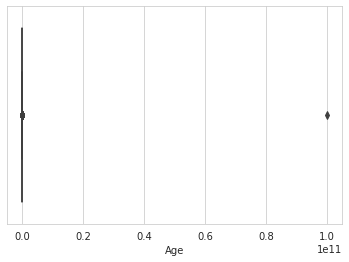

In [ ]:
sns.set_style('whitegrid')
sns.boxplot(df["Age"],boxprops={"facecolor": (.4, .6, .8, .5)})
        


Age has outliners

In [ ]:
df.drop(df[df['Age'] < 15].index, inplace = True) 
df.drop(df[df['Age'] > 70].index, inplace = True)


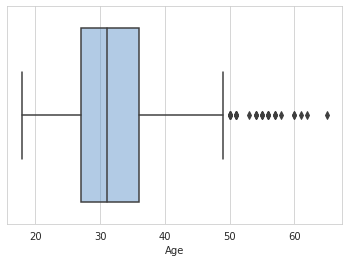

In [ ]:
sns.set_style('whitegrid')
sns.boxplot(df["Age"],boxprops={"facecolor": (.4, .6, .8, .5)})


In [ ]:

print(f"Unique Gender groups :{df['Gender'].unique()}")

Unique Gender groups :['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'Malr' 'femail' 'Cis Man'
 'ostensibly male, unsure what that really means']


In [ ]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)


In [ ]:
print(f"Unique Gender groups :{df['Gender'].unique()}")
print(df.Gender.value_counts())

Unique Gender groups :['Female' 'Male' 'Other']
Male      986
Female    246
Other      18
Name: Gender, dtype: int64


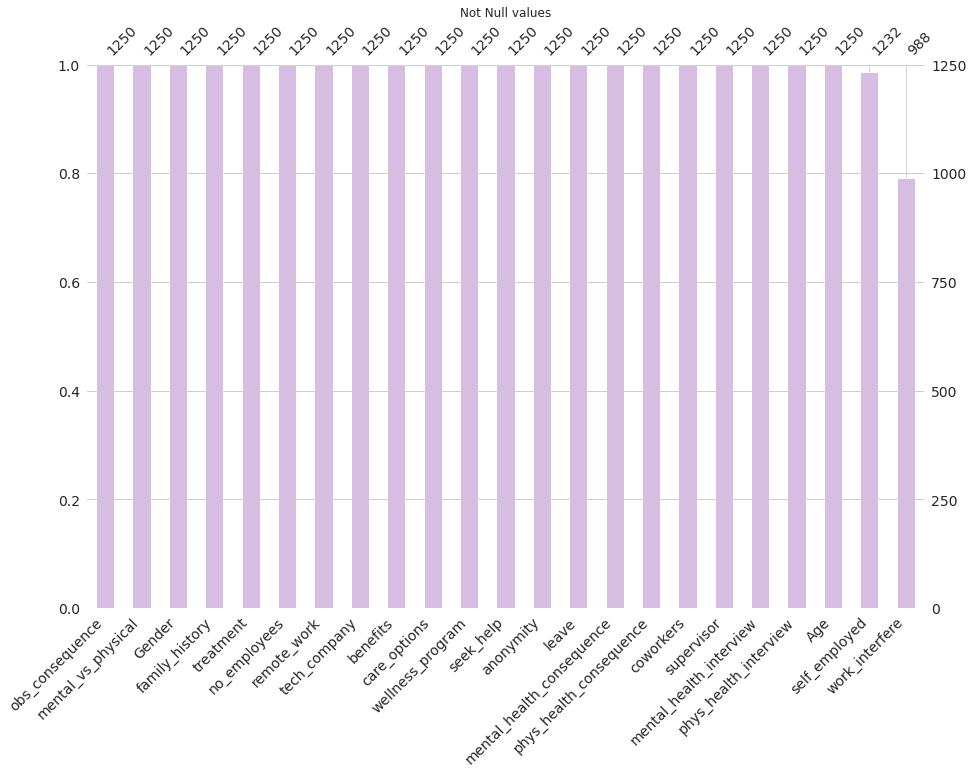

In [ ]:
plt.title("Not Null values")
msno.bar(df,fontsize =14, color = '#D7BDE2', sort = 'descending', figsize = (15,10))

In [ ]:
df.reset_index(drop=True)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,26,Male,No,No,Yes,NaN,26-100,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1246,32,Male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1247,34,Male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1248,46,Female,No,No,No,NaN,100-500,Yes,Yes,No,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


# Exploratory Data Analysis



## Have you sought treatment for a mental health condition?¶


In [ ]:
plt.figure(figsize=(5,5))
px.histogram(df, x = 'treatment',color='treatment')

<Figure size 360x360 with 0 Axes>

## What is your age?¶


In [ ]:
px.histogram(df, x = 'Age' , color = 'treatment' )

## Are you self-employed?¶


In [ ]:
px.histogram(df, x = 'self_employed',color='treatment',barmode='group')

## If you have a mental health condition, do you feel that it interferes with your work?

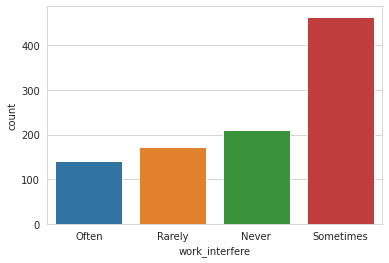

In [ ]:
sns.countplot(data = df , x = 'work_interfere')

In [ ]:


px.histogram(df, x = 'work_interfere',color='treatment',barmode='group')

## Do you have a family history of mental illness?¶


In [ ]:
px.histogram(df, x = 'family_history',color='treatment',barmode='group')


## Do you work remotely (outside of an office) at least 50% of the time?¶

In [ ]:
px.histogram(df, x = 'remote_work',color='treatment',barmode='group')

## Does your employer provide mental health benefits?¶


In [ ]:
px.histogram(df, x = 'benefits',color='treatment',barmode='group')

## Do you know the options for mental health care your employer provides?

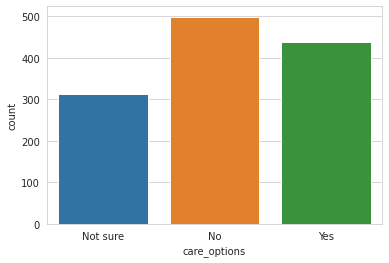

In [ ]:
sns.countplot(data = df , x = 'care_options')

In [ ]:
px.histogram(df, x = 'care_options',color='treatment',barmode='group')

## How many employees does your company or organization have?

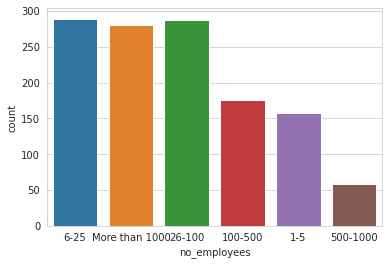

In [ ]:
sns.countplot(data = df , x = 'no_employees')

### Does size of organization determines whether it will benefits or not?

In [ ]:
px.histogram(df, x = 'no_employees',color='benefits',barmode='group')

##### Large companies (having more employees) provide benefits rather than small sized companies.

In [ ]:
px.histogram(df, x = 'no_employees',color='treatment',barmode='group')

## Has your employer ever discussed mental health as part of an employee wellness program?¶


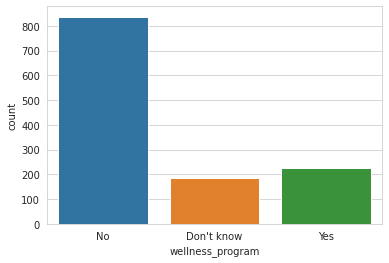

In [ ]:
sns.countplot(data = df , x = 'wellness_program')


In [ ]:
px.histogram(df, x = 'wellness_program',color='treatment',barmode='group')

## Does your employer provide resources to learn more about mental health issues and how to seek help?

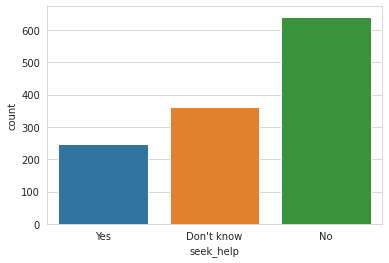

In [ ]:
sns.countplot(data = df , x = 'seek_help')

In [ ]:
px.histogram(df, x = 'seek_help',color='treatment',barmode='group')

## Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

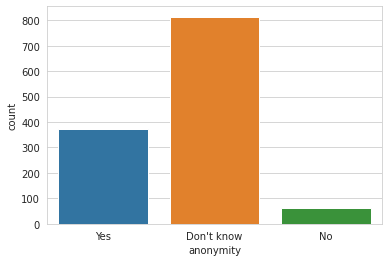

In [ ]:
sns.countplot(data = df , x = 'anonymity')

In [ ]:
px.histogram(df, x = 'anonymity',color='treatment',barmode='group')

## How easy is it for you to take medical leave for a mental health condition?

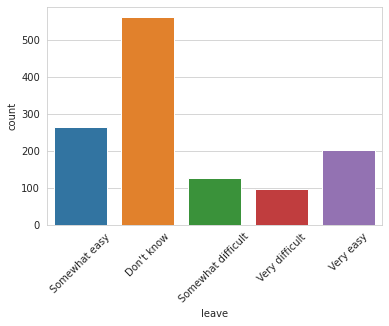

In [ ]:
sns.countplot(data = df , x = 'leave')
plt.xticks(rotation=45)
plt.show()

In [ ]:
px.histogram(df, x = 'leave',color='treatment',barmode='group')

## Do you think that discussing a mental health issue with your employer would have negative consequences?

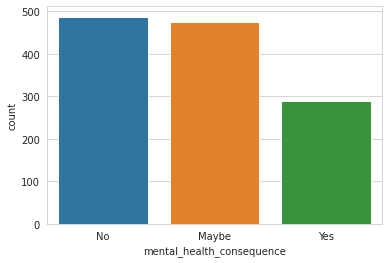

In [ ]:
sns.countplot(data = df , x = 'mental_health_consequence' )

In [ ]:
px.histogram(df, x = 'mental_health_consequence',color='treatment',barmode='group')

## Would you be willing to discuss a mental health issue with your coworkers?

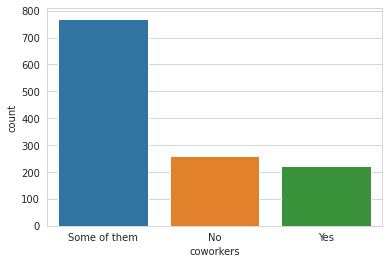

In [ ]:
sns.countplot(data = df , x = 'coworkers' )

In [ ]:
px.histogram(df, x = 'coworkers',color='treatment',barmode='group')

## Do you feel that your employer takes mental health as seriously as physical health?

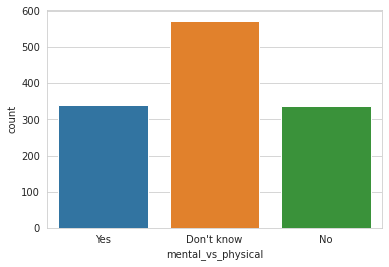

In [ ]:
sns.countplot(data = df , x = 'mental_vs_physical' )

In [ ]:
px.histogram(df, x = 'mental_vs_physical',color='treatment',barmode='group')

## Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

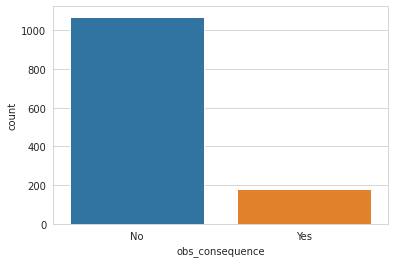

In [ ]:
sns.countplot(data = df , x = 'obs_consequence')

In [ ]:
px.histogram(df, x = 'obs_consequence',color='treatment',barmode='group')

# Model
 

In [ ]:
#Self employed column contains as low as 2% null values , so it is okay to replace it with mode.
df['self_employed'].isnull().sum()
a = df['self_employed'].mode().values[0]
df['self_employed'].fillna(a,inplace=True)

In [ ]:
# Work_interfere contains almost 20% null values
df[df['work_interfere'].isna()]['treatment'].value_counts()
# Never to replace null values
df['work_interfere'].fillna('Never',inplace=True)

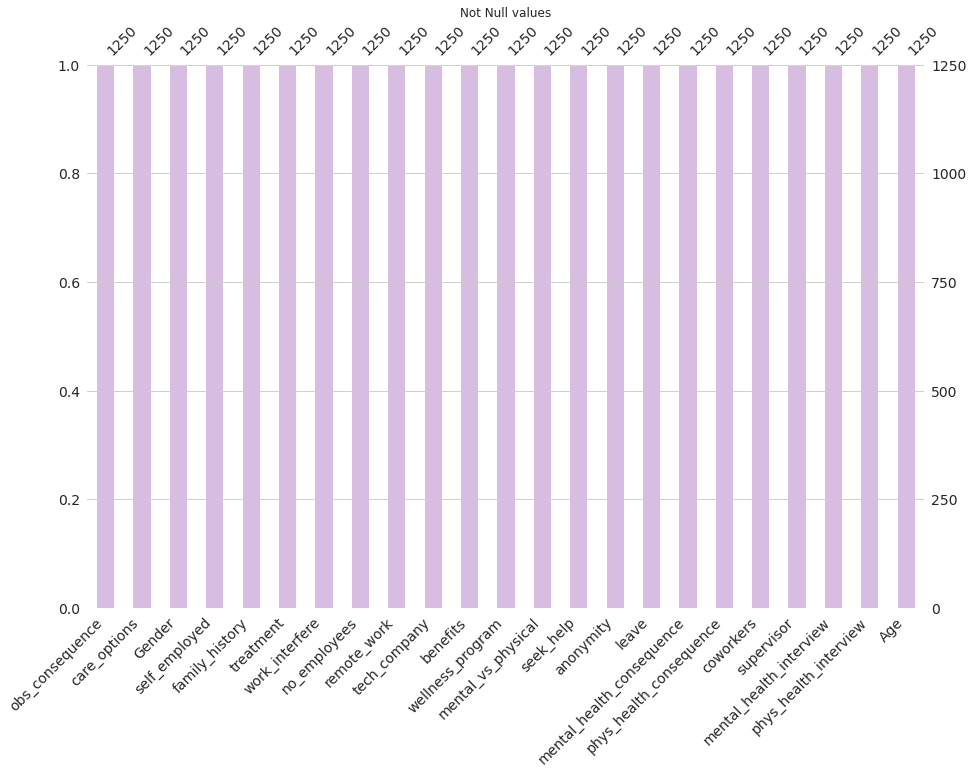

In [ ]:
plt.title("Not Null values")
msno.bar(df,fontsize =14, color = '#D7BDE2', sort = 'descending', figsize = (15,10))

In [ ]:
list_col=['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))
    

AGE :[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61] 
GENDER :['Female' 'Male' 'Other'] 
SELF_EMPLOYED :['No' 'Yes'] 
FAMILY_HISTORY :['No' 'Yes'] 
TREATMENT :['Yes' 'No'] 
WORK_INTERFERE :['Often' 'Rarely' 'Never' 'Sometimes'] 
NO_EMPLOYEES :['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000'] 
REMOTE_WORK :['No' 'Yes'] 
TECH_COMPANY :['Yes' 'No'] 
BENEFITS :['Yes' "Don't know" 'No'] 
CARE_OPTIONS :['Not sure' 'No' 'Yes'] 
WELLNESS_PROGRAM :['No' "Don't know" 'Yes'] 
SEEK_HELP :['Yes' "Don't know" 'No'] 
ANONYMITY :['Yes' "Don't know" 'No'] 
LEAVE :['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy'] 
MENTAL_HEALTH_CONSEQUENCE :['No' 'Maybe' 'Yes'] 
PHYS_HEALTH_CONSEQUENCE :['No' 'Yes' 'Maybe'] 
COWORKERS :['Some of them' 'No' 'Yes'] 
SUPERVISOR :['Yes' 'No' 'Some of them'] 
MENTAL_HEALTH_INTERVIEW :['No' 'Yes' 'Maybe'] 
PHYS_HEALTH_INTERVIEW :['Maybe' 'No' 'Yes

In [ ]:
# Let us divide training set into independent and dependent variables
X = df.drop('treatment',axis=1)
y = df['treatment']

### Encoding conserving the ordinal information.¶


In [ ]:
df.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

In [ ]:
df['age_bin'] = pd.cut(df['Age'], [0,20,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100], 
                              labels=['0-20', '20-30', '30-35', '35-40','40-45','45-50','50-55','55-60','60-65','65-70','70-75','75-80','80-85','85-90','90-95','95-100'])

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df1 = df.apply(le.fit_transform)
df1

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_bin
0,19,0,0,0,1,1,4,0,1,2,...,2,1,1,1,2,1,0,2,0,3
1,26,1,0,0,0,2,5,0,0,0,...,0,0,1,0,0,1,1,0,0,4
2,14,1,0,0,0,2,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,1,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,0,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,8,1,0,0,1,0,2,0,1,1,...,2,1,1,1,1,1,1,0,0,1
1255,14,1,0,1,1,1,2,1,1,2,...,1,1,1,1,2,1,1,2,0,2
1256,16,1,0,1,1,3,5,0,1,2,...,1,2,2,0,0,1,1,1,0,2
1257,28,0,0,0,0,0,1,1,1,1,...,0,2,1,0,0,1,1,1,0,5


In [ ]:
df1.drop('Age',axis=1,inplace=True)

In [ ]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kmodes.kmodes import KModes


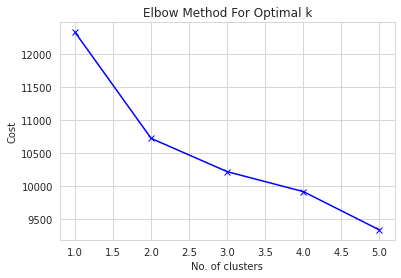

In [ ]:
cost = []
K = range(1,6)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 5, verbose=0)
    kmode.fit_predict(df1)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 10, verbose=1)
clusters= km_huang.fit_predict(df1)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 316, cost: 10873.0
Run 1, iteration: 2/100, moves: 60, cost: 10873.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 370, cost: 11222.0
Run 2, iteration: 2/100, moves: 42, cost: 11222.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 211, cost: 11335.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 329, cost: 11143.0
Run 4, iteration: 2/100, moves: 133, cost: 11024.0
Run 4, iteration: 3/100, moves: 167, cost: 10886.0
Run 4, iteration: 4/100, moves: 83, cost: 10851.0
Run 4, iteration: 5/100, moves: 17, cost: 10851.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 331, cost: 10789.0
Run 5, iteration: 2/100, moves: 86, cost: 1

array([1, 0, 1, ..., 0, 0, 0], dtype=uint16)

In [ ]:
df1.insert(0,"Cluster", clusters, True)
df1

,Cluster,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_bin
0,1,0,0,0,1,1,4,0,1,2,...,2,1,1,1,2,1,0,2,0,3
1,0,1,0,0,0,2,5,0,0,0,...,0,0,1,0,0,1,1,0,0,4
2,1,1,0,0,0,2,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0,1,0,1,1,1,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,1,1,0,0,0,0,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1,1,0,0,1,0,2,0,1,1,...,2,1,1,1,1,1,1,0,0,1
1255,0,1,0,1,1,1,2,1,1,2,...,1,1,1,1,2,1,1,2,0,2
1256,0,1,0,1,1,3,5,0,1,2,...,1,2,2,0,0,1,1,1,0,2
1257,0,0,0,0,0,0,1,1,1,1,...,0,2,1,0,0,1,1,1,0,5


In [ ]:
X = df1.drop('treatment',axis=1)
y = df1['treatment']

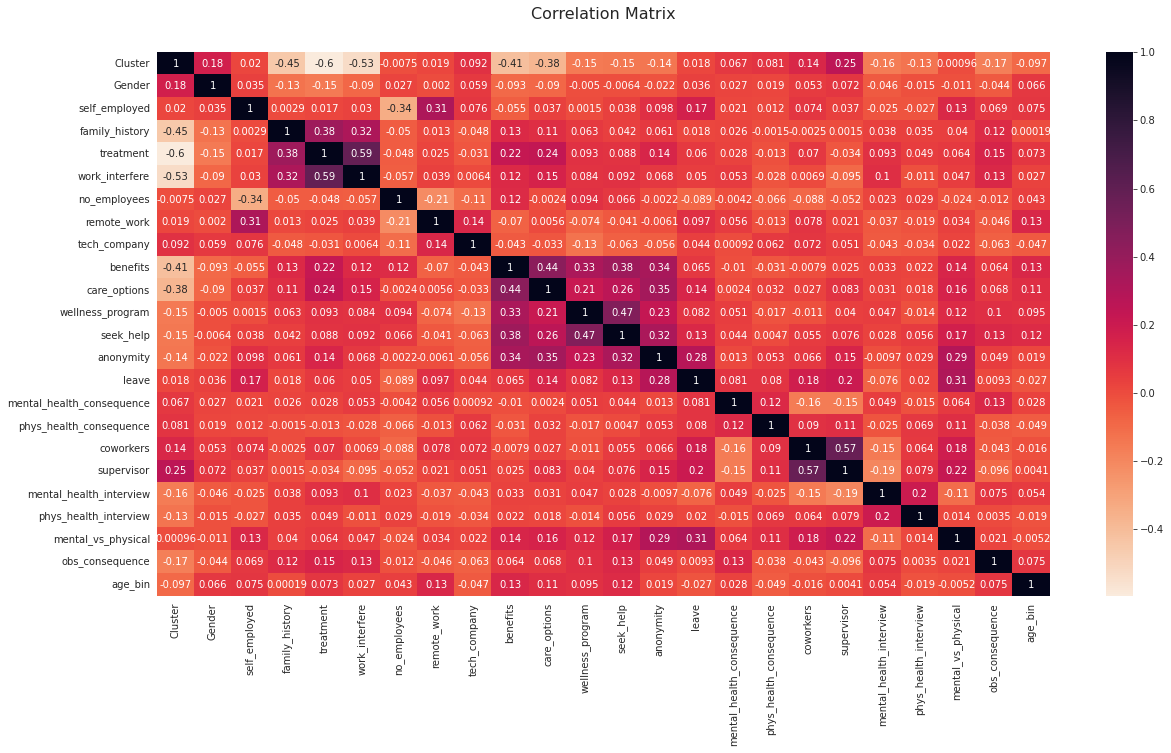

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Correlation Matrix', fontsize = 16, y = 1.05)
  
sns.heatmap(df1.corr(), annot = True, cmap = 'rocket_r');

## Model building and evaluation¶


In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score,train_test_split
df.dropna()
print(df.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=49) # 80% training and 20% test

(1250, 24)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score,plot_roc_curve

def evaluate_model(clf, X_test, y_test):

    # predict the response for test dataset
    y_pred = clf.predict(X_test)

    print("Accuracy:",accuracy_score(y_test, y_pred))

    # precision: what percentage of positive tuples are labeled as such?
    print("Precision:",precision_score(y_test, y_pred))

    # recall: what percentage of positive tuples are labelled as such?
    print("Recall:",recall_score(y_test, y_pred))

    print("F1_Score:",f1_score(y_test, y_pred))


    

## Extra Trees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

# Create the Extra Trees classifier
model = ExtraTreesClassifier()

# Define the hyperparameter grid
param_grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [None, 5, 10, 15],
              'min_samples_split': [2, 5, 10]}

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']

# Use the best hyperparameters to create a new model
best_model = ExtraTreesClassifier(n_estimators=best_n_estimators,
                                  max_depth=best_max_depth,
                                  min_samples_split=best_min_samples_split)

# Fit the best model to the data
best_model.fit(X_train, y_train)
print(grid_search.best_params_)
# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)
print('Test accuracy:', accuracy)



{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Test accuracy: 0.852


In [ ]:
evaluate_model(best_model,X_test,y_test)

Accuracy: 0.852
Precision: 0.85
Recall: 0.8429752066115702
F1_Score: 0.846473029045643


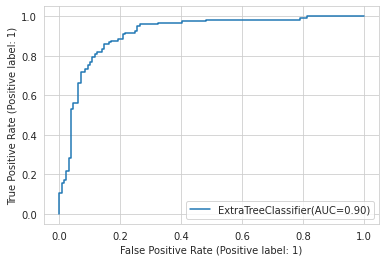

In [ ]:
plot_roc_curve(best_model,X_test,y_test,label='ExtraTreeClassifier(AUC=0.90)')

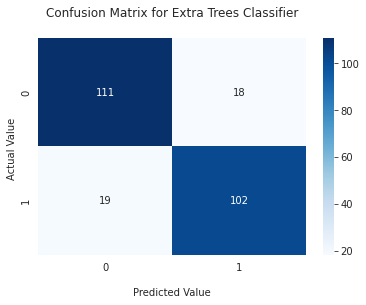

In [ ]:
y_pred = best_model.predict(X_test)
matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(matrix,annot=True,cmap='Blues',fmt='g')
ax.set_title('Confusion Matrix for Extra Trees Classifier\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');
plt.show()

## MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,35),activation='relu',alpha=0.6,
                    max_iter=500,
                    verbose=True,power_t=0.5,
                    learning_rate_init=0.12)
mlp_clf.fit(X_train,y_train)


Iteration 1, loss = 8.84391439
Iteration 2, loss = 2.16218121
Iteration 3, loss = 1.80203857
Iteration 4, loss = 1.93719607
Iteration 5, loss = 2.10170005
Iteration 6, loss = 1.87916104
Iteration 7, loss = 1.76171976
Iteration 8, loss = 1.66031267
Iteration 9, loss = 1.53093623
Iteration 10, loss = 1.39512065
Iteration 11, loss = 1.28119443
Iteration 12, loss = 1.16351399
Iteration 13, loss = 1.06976915
Iteration 14, loss = 0.98232382
Iteration 15, loss = 0.91035915
Iteration 16, loss = 0.84237730
Iteration 17, loss = 0.81243734
Iteration 18, loss = 0.76186790
Iteration 19, loss = 0.69916785
Iteration 20, loss = 0.67066917
Iteration 21, loss = 0.64982527
Iteration 22, loss = 0.59447600
Iteration 23, loss = 0.58194601
Iteration 24, loss = 0.55474945
Iteration 25, loss = 0.52950288
Iteration 26, loss = 0.51919360
Iteration 27, loss = 0.50576364
Iteration 28, loss = 0.48549716
Iteration 29, loss = 0.48329056
Iteration 30, loss = 0.48272310
Iteration 31, loss = 0.49659867
Iteration 32, los

MLPClassifier(alpha=0.6, hidden_layer_sizes=(150, 35), learning_rate_init=0.12,
              max_iter=500, verbose=True)

In [ ]:
mlp_clf.score(X_test,y_test)

0.828

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Create a dictionary of hyperparameters to tune
param_grid = {'hidden_layer_sizes': [(10,), (50,), (100,)],
              'activation': ['relu', 'tanh'],
              'learning_rate_init': [0.001, 0.01, 0.1]}

# Create an MLP classifier with default hyperparameters
mlp = MLPClassifier()

# Use grid search to find the best combination of hyperparameters
grid_search = GridSearchCV(mlp, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best combination of hyperparameters
print(grid_search.best_params_)

# Use the best combination of hyperparameters to train the model
best_mlp = grid_search.best_estimator_
best_mlp.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = best_mlp.score(X_test, y_test)
print(f"Test set score: {test_score:.2f}")


{'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}
Test set score: 0.87


In [ ]:
evaluate_model(best_mlp,X_test,y_test)

Accuracy: 0.868
Precision: 0.8666666666666667
Recall: 0.859504132231405
F1_Score: 0.8630705394190872


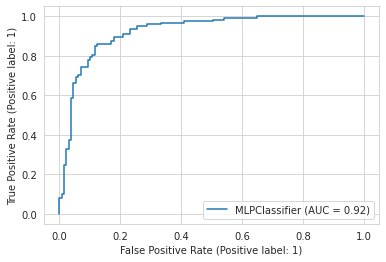

In [ ]:
plot_roc_curve(best_mlp, X_test, y_test)

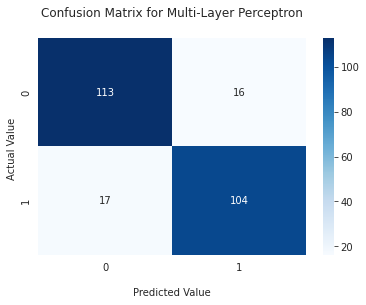

In [ ]:
y_pred = best_mlp.predict(X_test)
matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(matrix,annot=True,cmap='Blues',fmt='g')
ax.set_title('Confusion Matrix for Multi-Layer Perceptron\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');
plt.show()

## Lgbm

In [ ]:
import lightgbm as lgbm  # standard alias
lgbm_clf = lgbm.LGBMClassifier(n_estimators= 20,
		learning_rate= 1,
		num_leaves= 200,
		max_depth= 100,
		min_data_in_leaf= 9,
		lambda_l1= 100,
		lambda_l2= 50,
		min_gain_to_split= 3,
		bagging_fraction= 0.9,
		bagging_freq= 1,
		feature_fraction= 0.6,random_state=5)
lgbm_clf.fit(
        X_train,
        y_train)

LGBMClassifier(bagging_fraction=0.9, bagging_freq=1, feature_fraction=0.6,
               lambda_l1=100, lambda_l2=50, learning_rate=1, max_depth=100,
               min_data_in_leaf=9, min_gain_to_split=3, n_estimators=20,
               num_leaves=200, random_state=5)

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Create a LightGBM classifier
gbm = lgb.LGBMClassifier()

# Create a parameter grid to search over
param_grid = {
    'learning_rate': [1,0.1, 0.01, 0.001],
    'n_estimators': [20,50,100, 500, 1000],
    'num_leaves': [5, 10, 15,20,30,50,100],
    'max_depth': [3, 4, 5,10,20]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(gbm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print(grid_search.best_params_)

best_lgbm = grid_search.best_estimator_
best_lgbm.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = best_lgbm.score(X_test, y_test)
print(f"Test set score: {test_score:.2f}")


{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000, 'num_leaves': 10}
Test set score: 0.85


In [ ]:
evaluate_model(best_lgbm,X_test,y_test)

Accuracy: 0.848
Precision: 0.8487394957983193
Recall: 0.8347107438016529
F1_Score: 0.8416666666666667


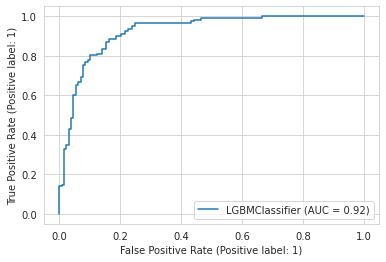

In [ ]:
plot_roc_curve(best_lgbm, X_test, y_test)

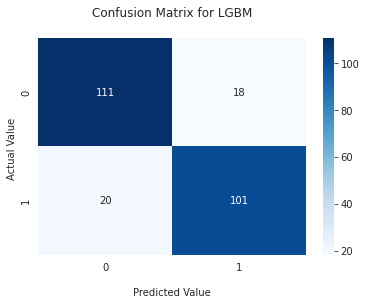

In [ ]:
y_pred = best_lgbm.predict(X_test)
matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(matrix,annot=True,cmap='Blues',fmt='g')
ax.set_title('Confusion Matrix for LGBM\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');
plt.show()

## XGBOOST

In [ ]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators =1, gamma =6,
                    reg_alpha =  50,min_child_weight=10,
                    colsample_bytree=1)
xgb_clf.fit(X_train, y_train)

XGBClassifier(gamma=6, min_child_weight=10, n_estimators=1, reg_alpha=50)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create a dictionary of hyperparameters to tune
param_grid = {'max_depth': [3, 5, 7],
              'learning_rate': [0.1, 0.3, 0.5],
              'n_estimators': [100, 300, 500]}

# Create an XGBoost classifier with default hyperparameters
xgbc = xgb.XGBClassifier()

# Use grid search to find the best combination of hyperparameters
grid_search = GridSearchCV(xgbc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best combination of hyperparameters
print(grid_search.best_params_)

# Use the best combination of hyperparameters to train the model
best_xgbc = grid_search.best_estimator_
best_xgbc.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = best_xgbc.score(X_test, y_test)
print(f"Test set score: {test_score:.2f}")


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Test set score: 0.87


In [ ]:
evaluate_model(best_xgbc,X_test,y_test)

Accuracy: 0.868
Precision: 0.8548387096774194
Recall: 0.8760330578512396
F1_Score: 0.8653061224489798


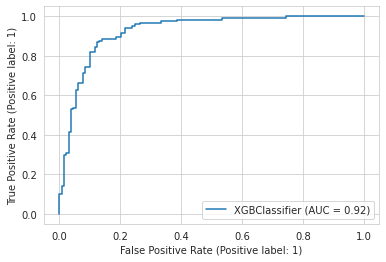

In [ ]:
plot_roc_curve(best_xgbc, X_test, y_test)

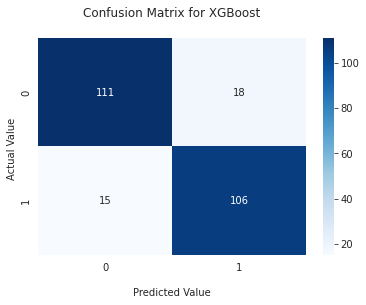

In [ ]:
y_pred = best_xgbc.predict(X_test)
matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(matrix,annot=True,cmap='Blues',fmt='g')
ax.set_title('Confusion Matrix for XGBoost\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');
plt.show()

## Voting Classifier Hard

In [ ]:
from sklearn.ensemble import VotingClassifier
named_estimators = [ ("multi-layer_perceptron_clf", best_mlp), ("xgboost_clf", best_xgbc),("lgbm_clf", best_lgbm),("extra_trees_clf",gsExtC)]

In [ ]:
voting_clf = VotingClassifier(named_estimators)

In [ ]:
voting_clf.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


VotingClassifier(estimators=[('multi-layer_perceptron_clf',
                              MLPClassifier(activation='tanh')),
                             ('xgboost_clf', XGBClassifier()),
                             ('lgbm_clf',
                              LGBMClassifier(learning_rate=0.01, max_depth=10,
                                             n_estimators=1000,
                                             num_leaves=10)),
                             ('extra_trees_clf',
                              GridSearchCV(estimator=ExtraTreesClassifier(),
                                           n_jobs=4,
                                           param_grid={'bootstrap': [False],
                                                       'criterion': ['gini'],
                                                       'max_depth': [None],
                                                       'max_features': [1, 3,
                                                                        10],


In [ ]:
voting_clf.score(X_test, y_test)

0.868

In [ ]:
[estimator.score(X_test, y_test) for estimator in voting_clf.estimators_]

[0.844, 0.868, 0.848, 0.864]

In [ ]:
evaluate_model(voting_clf,X_test,y_test)

Accuracy: 0.868
Precision: 0.8728813559322034
Recall: 0.8512396694214877
F1_Score: 0.8619246861924688


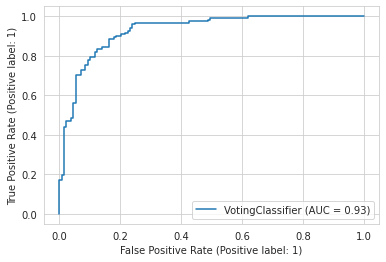

In [ ]:
plot_roc_curve(voting_clf, X_test, y_test)

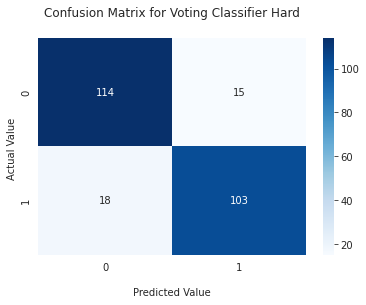

In [ ]:
y_pred = voting_clf.predict(X_test)
matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(matrix,annot=True,cmap='Blues',fmt='g')
ax.set_title('Confusion Matrix for Voting Classifier Hard\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');
plt.show()

## Voting Classfier Soft

In [ ]:
voting_clf.voting = "soft"
voting_clf.score(X_test, y_test)

0.852

In [ ]:
[estimator.score(X_test, y_test) for estimator in voting_clf.estimators_]

[0.844, 0.868, 0.848, 0.864]

In [ ]:
evaluate_model(voting_clf,X_test,y_test)

Accuracy: 0.852
Precision: 0.85
Recall: 0.8429752066115702
F1_Score: 0.846473029045643


## ANN

In [ ]:
import tensorflow as tf
from keras.layers import LeakyReLU
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units = 20, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 15, activation = 'LeakyReLU'))
ann.add(tf.keras.layers.Dense(units = 15, activation = 'LeakyReLU'))
ann.add(tf.keras.layers.Dense(units = 10, activation = 'LeakyReLU'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'LeakyReLU'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'LeakyReLU'))
ann.add(tf.keras.layers.Dense(units = 3, activation = 'LeakyReLU'))
ann.add(tf.keras.layers.Dense(units = 3, activation = 'LeakyReLU'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 50, epochs = 1000)
y_pred_prob = ann.predict(X_test)


Epoch 1/1000
20/20 [==============================] - 2s 4ms/step - loss: 0.6804 - accuracy: 0.6370
Epoch 2/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.6512 - accuracy: 0.7480
Epoch 3/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.5920 - accuracy: 0.7810
Epoch 4/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.5097 - accuracy: 0.8000
Epoch 5/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.4529 - accuracy: 0.8070
Epoch 6/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.8080
Epoch 7/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8190
Epoch 8/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8120
Epoch 9/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8160
Epoch 10/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.4056 - accuracy: 0.8200

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense

# Define a function that creates the ANN model

def create_model(learning_rate=0.01, hidden_layer_sizes=(100,)):
    model = Sequential()
    model.add(Dense(units=10, input_dim=23, activation='LeakyReLU'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create a KerasClassifier object
model = KerasClassifier(build_fn=create_model)

# Define the hyperparameter grid
param_grid = {'learning_rate': [1,0.5,0.1,0.05, 0.01, 0.001],
              'hidden_layer_sizes': [(10,),(20,), (50,), (100,),(200,)]}

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_learning_rate = grid_search.best_params_['learning_rate']
best_hidden_layer_sizes = grid_search.best_params_['hidden_layer_sizes']

# Use the best hyperparameters to create a new model
best_model = create_model(learning_rate=best_learning_rate,
                         hidden_layer_sizes=best_hidden_layer_sizes)

# Fit the best model to the data
best_model.fit(X_train, y_train, epochs=100, batch_size=50)

# Evaluate the best model on the test set
loss, accuracy = best_model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


32/32 [==============================] - 1s 2ms/step - loss: 0.7149 - accuracy: 0.5800
Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7546 - accuracy: 0.4960
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7032 - accuracy: 0.5520
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.5920
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.6390
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6235 - accuracy: 0.6670
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.6880
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5846 - accuracy: 0.7170
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.7290
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5525 - accuracy: 0.7450
Epoch 10/100
20/20 [==

8/8 [==============================] - 0s 2ms/step


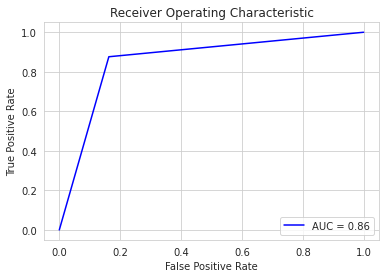

In [ ]:
from sklearn.metrics import roc_curve, auc

# Generate predictions for each example in the test set
predictions = best_model.predict(X_test).round()

# Calculate the false positive rate and true positive rate at different classification thresholds
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the AUC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


8/8 [==============================] - 0s 2ms/step


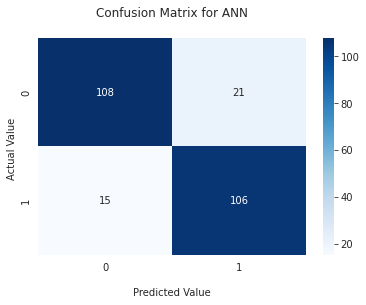

In [ ]:
predictions = best_model.predict(X_test).round()

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)
ax = sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
ax.set_title('Confusion Matrix for ANN\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.856
Precision: 0.8346456692913385
Recall: 0.8760330578512396
F1 Score: 0.8548387096774192
